
## Data preprocessing

In [1]:
from itertools import chain
import pandas as pd
import numpy as np
from datetime import timedelta

# 1. import df: merge_raw_1 and df: index_date

In [2]:
file0_path = '/blue/bianjiang/leyang.sun/subset_identification_serena_patid_v7_index_ini.csv'
df_index_date = pd.read_csv(file0_path)
df_index_date['index_date'] = pd.to_datetime(df_index_date['index_date'])
df_index_date = df_index_date[['deid_pat_ID', 'index_date']]
print(df_index_date)

                   deid_pat_ID index_date
0       IRB202003281_PAT_10045 2016-11-23
1       IRB202003281_PAT_10055 2015-08-05
2       IRB202003281_PAT_10065 2017-03-21
3      IRB202003281_PAT_100942 2016-01-14
4       IRB202003281_PAT_10095 2019-12-05
...                        ...        ...
11605    IRB202003281_PAT_9788 2021-06-08
11606    IRB202003281_PAT_9790 2017-08-04
11607    IRB202003281_PAT_9845 2021-01-12
11608    IRB202003281_PAT_9871 2021-10-01
11609     IRB202003281_PAT_995 2016-10-21

[11610 rows x 2 columns]


In [3]:
file_path = '/blue/bianjiang/leyang.sun/merged_raw_1.csv'
df_t2d_ehr = pd.read_csv(file_path)
df_t2d_ehr['START_DATE'] = pd.to_datetime(df_t2d_ehr['START_DATE'])
print(df_t2d_ehr.head)

<bound method NDFrame.head of          Unnamed: 0             deid_pat_ID  SEX_CD  \
0                 0  IRB202003281_PAT_10045  Female   
1                 1  IRB202003281_PAT_10045  Female   
2                 2  IRB202003281_PAT_10045  Female   
3                 3  IRB202003281_PAT_10045  Female   
4                 4  IRB202003281_PAT_10045  Female   
...             ...                     ...     ...   
8796276     8796276    IRB202003281_PAT_995  Female   
8796277     8796277    IRB202003281_PAT_995  Female   
8796278     8796278    IRB202003281_PAT_995  Female   
8796279     8796279    IRB202003281_PAT_995  Female   
8796280     8796280    IRB202003281_PAT_995  Female   

                           RACE_CD  Index_age  Index_diff  \
0                            Other         50  18157 days   
1                            Other         50  18157 days   
2                            Other         50  18157 days   
3                            Other         50  18157 days   
4   

In [4]:
df_t2d_ehr_no_duplicates = df_t2d_ehr.drop_duplicates()
print(df_t2d_ehr_no_duplicates.index)

RangeIndex(start=0, stop=8796281, step=1)


In [5]:
print(df_t2d_ehr['HbA1c'].isna().sum()) # 807465 left

7988816


## filter out patients witho no HbA1c value

In [5]:
# Extract rows with non-zero values in both 'Column1' or 'Column2'
specific_column_name = 'HbA1c'
df_t2d_ehr_with_h1 = df_t2d_ehr[df_t2d_ehr[specific_column_name].notna()]
print(df_t2d_ehr_with_h1.index)

Index([      0,       1,       2,       3,       4,       5,       6,     285,
           286,     287,
       ...
       8795450, 8795451, 8795452, 8795560, 8795583, 8795684, 8795685, 8795686,
       8795687, 8795688],
      dtype='int64', length=807465)


In [6]:
print(df_t2d_ehr_with_h1.head)

<bound method NDFrame.head of          Unnamed: 0             deid_pat_ID  SEX_CD  \
0                 0  IRB202003281_PAT_10045  Female   
1                 1  IRB202003281_PAT_10045  Female   
2                 2  IRB202003281_PAT_10045  Female   
3                 3  IRB202003281_PAT_10045  Female   
4                 4  IRB202003281_PAT_10045  Female   
...             ...                     ...     ...   
8795684     8795684    IRB202003281_PAT_995  Female   
8795685     8795685    IRB202003281_PAT_995  Female   
8795686     8795686    IRB202003281_PAT_995  Female   
8795687     8795687    IRB202003281_PAT_995  Female   
8795688     8795688    IRB202003281_PAT_995  Female   

                           RACE_CD  Index_age  Index_diff  \
0                            Other         50  18157 days   
1                            Other         50  18157 days   
2                            Other         50  18157 days   
3                            Other         50  18157 days   
4   

In [7]:
df_encdate = df_t2d_ehr_with_h1[['deid_pat_ID', 'START_DATE']]
print(df_encdate) # 807465


                    deid_pat_ID START_DATE
0        IRB202003281_PAT_10045 2016-06-02
1        IRB202003281_PAT_10045 2016-02-18
2        IRB202003281_PAT_10045 2015-11-16
3        IRB202003281_PAT_10045 2016-09-28
4        IRB202003281_PAT_10045 2015-08-20
...                         ...        ...
8795684    IRB202003281_PAT_995 2014-04-23
8795685    IRB202003281_PAT_995 2015-12-16
8795686    IRB202003281_PAT_995 2015-07-22
8795687    IRB202003281_PAT_995 2015-03-12
8795688    IRB202003281_PAT_995 2014-12-12

[807465 rows x 2 columns]


In [8]:
# 'SEX_CD', 'RACE_CD'
cont_cols = ['Index_age','BP_Diastolic', 'Triglycerides', 'HDL', 
             'BMI', 'GFR', 'LDL', 'med_Metformin', 'med_Thiazolidinedione', 
             'med_DPP4i', 'med_RAS', 'med_non_loops', 'med_Sulfonylurea', 
             'med_lipid', 'med_Loop', 'med_CCB', 'med_Beta_blockers','HbA1c']
disc_cols = ['comp_Alcohol_use_disorder', 'comp_Pregnancy', 'comp_Angina_flag',
            'comp_Blindness_and_vision_loss', 'comp_Congestive_heart_failure',
            'comp_Depression', 'comp_Myocardial_Infarction_MI', 'comp_Cardiac_revascularization',
            'comp_History_of_Myocardial_Infarction', 'comp_Obesity',
            'comp_Cerebrovascular_Disease', 'comp_Hypoglycemia', 
            'comp_Lower_extremity_amputation', 'comp_Hypertension',
            'comp_Exercise_x', 'comp_Photocoagulation', 'comp_Exercise_y',
            'comp_Foot_ulcer', 'comp_History_of_stroke', 'comp_Cancer', 
            'comp_Hypercholesterolaemia', 'comp_Visual_impairment', 
            'comp_End_Stage_Renal_Disease', 'comp_Cardiovascular_Disease', 
            'comp_Retinopathy_intravitreal_injections', 'comp_Drug_use_disorder', 
            'comp_Organ_transplant', 'comp_Ketoacidosis', 'comp_Neuropathy', 
            'comp_Stroke', 'comp_Secondary_diabetes', 'comp_Atrial_fibrillation', 
            'comp_Chronic_kidney_disease', 'comp_Peripheral_vascular_disease', 
            'comp_Gestational_diabetes', 'comp_Nephropathy', 'comp_Retinopathy']
total_col= cont_cols + disc_cols

print(len(cont_cols),len(total_col))

18 55


In [9]:

# Precompute minimum and maximum 'START_DATE' for each patient
min_start_dates = df_t2d_ehr_with_h1.groupby('deid_pat_ID')['START_DATE'].min()
max_start_dates = df_t2d_ehr_with_h1.groupby('deid_pat_ID')['START_DATE'].max()

# Initialize an empty list to store DataFrames for concatenation
dfs_to_concat = []

for patient_id in min_start_dates.index:
    max_start_date = max_start_dates[patient_id]
    min_start_date = min_start_dates[patient_id]
    num_time_windows = (max_start_date - min_start_date).days // 90 + 1

    for i in range(num_time_windows):
        start_date = min_start_date + pd.DateOffset(days=90 * i)
        end_date = min_start_date + pd.DateOffset(days=90 * (i + 1))

        data_within_time_window = df_t2d_ehr_with_h1[
            (df_t2d_ehr_with_h1['deid_pat_ID'] == patient_id) &
            (df_t2d_ehr_with_h1['START_DATE'] >= start_date) &
            (df_t2d_ehr_with_h1['START_DATE'] < end_date)
            ]

        if not data_within_time_window.empty:
            new_row = {'deid_pat_ID': patient_id, 'timestamp': i + 1}
            for col in total_col:
                average_value = data_within_time_window[col].mean()
                new_row[col] = average_value
            dfs_to_concat.append(pd.DataFrame([new_row]))

        else:
            # If data_within_time_window is empty, copy the record of the last timepoint
            last_timestamp_data = dfs_to_concat[-1][dfs_to_concat[-1]['deid_pat_ID'] == patient_id]
            new_row = {'deid_pat_ID': patient_id, 'timestamp': i + 1}
            for col in total_col:
                new_row[col] = last_timestamp_data[col].values[0]
            dfs_to_concat.append(pd.DataFrame([new_row]))            
            
            
# Concatenate DataFrames in the list
result_df = pd.concat(dfs_to_concat, ignore_index=True)

# Fill missing values with values from the last timestamp
result_df = result_df.ffill()

# Print the updated DataFrame
print(result_df)


                   deid_pat_ID  timestamp  Index_age  BP_Diastolic  \
0       IRB202003281_PAT_10006          1       48.0           NaN   
1       IRB202003281_PAT_10006          2       48.0           NaN   
2       IRB202003281_PAT_10006          3       48.0           NaN   
3       IRB202003281_PAT_10006          4       48.0           NaN   
4       IRB202003281_PAT_10006          5       48.0           NaN   
...                        ...        ...        ...           ...   
152134   IRB202003281_PAT_9997         22       47.0          70.0   
152135   IRB202003281_PAT_9997         23       47.0          70.0   
152136   IRB202003281_PAT_9997         24       47.0          70.0   
152137   IRB202003281_PAT_9997         25       47.0          70.0   
152138   IRB202003281_PAT_9997         26       47.0          70.0   

        Triglycerides   HDL    BMI    GFR   LDL  med_Metformin  ...  \
0               308.0  46.0  38.92  102.0  94.0            NaN  ...   
1               3

In [ ]:
import pandas as pd
from datetime import timedelta

# Sample DataFrame with patient data, including multiple value columns
data = {'deid_pat_ID': [1, 1, 1, 1, 2, 2, 2],
        'START_DATE': ['2023-01-01', '2023-04-05', '2023-08-20', '2023-09-15', '2023-02-10', '2023-03-25', '2023-07-10'],
        'value1': [10, 15, 12, 18, 5, 7, 9],
        'value2': [8, 13, 11, 17, 4, 6, 8],
        'value3': [9, 14, 10, 16, 6, 8, 7]}
df = pd.DataFrame(data)

# Convert 'START_DATE' to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Initialize an empty DataFrame to store the results with columns
result_df = pd.DataFrame(columns=['deid_pat_ID', 'timestamp'] + [col for col in df.columns if col.startswith('value')])

# Group the data by 'deid_pat_ID'
grouped = df.groupby('deid_pat_ID')

# Iterate over each patient's data
for patient_id, patient_group in grouped:
    # Calculate the minimum and maximum 'START_DATE' for the patient
    min_start_date = patient_group['START_DATE'].min()
    max_start_date = patient_group['START_DATE'].max()

    # Calculate the number of three-month time windows
    num_time_windows = (max_start_date - min_start_date).days // 90 + 1

    # Iterate over each time window
    for i in range(num_time_windows):
        # Calculate the start and end dates for the time window
        start_date = min_start_date + timedelta(days=90 * i)
        end_date = min_start_date + timedelta(days=90 * (i + 1))

        # Filter data for the current time window
        data_within_time_window = patient_group[(patient_group['START_DATE'] >= start_date) & (patient_group['START_DATE'] < end_date)]

        if len(data_within_time_window) == 0:
            # If there is no data in the time window, copy the values from the last timestamp
            if i > 0:
                last_row = result_df[(result_df['deid_pat_ID'] == patient_id) & (result_df['timestamp'] == i)].copy()
                last_row['timestamp'] = i + 1
                result_df = result_df.append(last_row)
        else:
            # Calculate the average values for the time window for each value column
            new_row = {'deid_pat_ID': patient_id, 'timestamp': i + 1}
            df_new_row = pd.DataFrame([new_row], index=[0])
            for col in df.columns:    
                if col.startswith('value'):
                    average_value = data_within_time_window[col].mean()
                    df_new_row[col] = average_value
            result_df = pd.concat([result_df, df_new_row], ignore_index=True)



In [10]:
print(result_df["comp_Chronic_kidney_disease"].unique())

[0.         0.98969072 1.         0.9375     0.5        0.66666667
 0.94117647 0.07142857 0.33333333 0.75       0.57142857 0.92307692
 0.25       0.35294118 0.02702703 0.05263158 0.94736842 0.00277008
 0.85714286 0.04       0.125      0.99310345 0.06666667 0.09183673
 0.48979592 0.02040816 0.53846154 0.01020408 0.72727273 0.01351351
 0.99082569 0.97297297 0.48648649 0.08333333 0.2        0.46153846
 0.44444444 0.16666667 0.14285714 0.49541284 0.375      0.96
 0.00230415 0.98245614 0.07692308 0.88888889 0.09090909 0.24038462
 0.04545455 0.01369863 0.1        0.02173913 0.18181818 0.05882353]


In [11]:
result_df.to_csv('/blue/bianjiang/leyang.sun/aggreg_data.csv')

In [21]:
# Print the updated DataFrame
print(result_df)

                   deid_pat_ID  timestamp  Index_age  BP_Diastolic  \
0       IRB202003281_PAT_10006          1       48.0           NaN   
1       IRB202003281_PAT_10006          2       48.0           NaN   
2       IRB202003281_PAT_10006          3       48.0           NaN   
3       IRB202003281_PAT_10006          4       48.0           NaN   
4       IRB202003281_PAT_10006          5       48.0           NaN   
...                        ...        ...        ...           ...   
152134   IRB202003281_PAT_9997         22       47.0          70.0   
152135   IRB202003281_PAT_9997         23       47.0          70.0   
152136   IRB202003281_PAT_9997         24       47.0          70.0   
152137   IRB202003281_PAT_9997         25       47.0          70.0   
152138   IRB202003281_PAT_9997         26       47.0          70.0   

        Triglycerides   HDL    BMI    GFR   LDL  med_Metformin  ...  \
0               308.0  46.0  38.92  102.0  94.0            NaN  ...   
1               3

In [ ]:
# check the min count of time stamp of each patient and select obs_count and pred_count

In [ ]:

# result_df = pd.read_csv('/blue/bianjiang/leyang.sun/aggreg_data.csv')

In [12]:
# Group by 'deid_pat_ID' and count the timestamps
timestamp_counts = result_df.groupby('deid_pat_ID')['timestamp'].count().reset_index()
timestamp_counts.columns = ['deid_pat_ID', 'timestamp_count']

# Display the result
print(timestamp_counts)

                  deid_pat_ID  timestamp_count
0      IRB202003281_PAT_10006                8
1      IRB202003281_PAT_10010                1
2      IRB202003281_PAT_10045                8
3      IRB202003281_PAT_10055               14
4      IRB202003281_PAT_10065               11
...                       ...              ...
10149   IRB202003281_PAT_9968               13
10150   IRB202003281_PAT_9972               24
10151   IRB202003281_PAT_9974               10
10152   IRB202003281_PAT_9982                1
10153   IRB202003281_PAT_9997               26

[10154 rows x 2 columns]


### filter the rows where 'timestamp_count' is greater than or equal to 3

In [13]:
merged_df = result_df.merge(timestamp_counts, on='deid_pat_ID', how='left')

# Then, filter the rows where 'timestamp_count' is greater than or equal to 3
filtered_df = merged_df[merged_df['timestamp_count'] >= 3]

# Drop the 'timestamp_count' column if you no longer need it
filtered_df = filtered_df.drop('timestamp_count', axis=1)

                 deid_pat_ID  timestamp_count
9281  IRB202003281_PAT_82110                1
5435   IRB202003281_PAT_4780                1
9172  IRB202003281_PAT_80507                1
1038  IRB202003281_PAT_14766                1
5441  IRB202003281_PAT_47845                1
...                      ...              ...
8345  IRB202003281_PAT_72207               41
2414  IRB202003281_PAT_23729               41
4873  IRB202003281_PAT_43544               42
8382  IRB202003281_PAT_72514               42
1326  IRB202003281_PAT_16550               42

[10154 rows x 2 columns]


In [17]:
print(filtered_df)

                  deid_pat_ID  timestamp  Index_age  BP_Diastolic  \
3      IRB202003281_PAT_10045          1       50.0           NaN   
4      IRB202003281_PAT_10045          2       50.0           NaN   
5      IRB202003281_PAT_10045          3       50.0           NaN   
6      IRB202003281_PAT_10045          4       50.0           NaN   
7      IRB202003281_PAT_10045          6       50.0           NaN   
...                       ...        ...        ...           ...   
72512   IRB202003281_PAT_9997         21       47.0          70.0   
72513   IRB202003281_PAT_9997         23       47.0          70.0   
72514   IRB202003281_PAT_9997         24       47.0          70.0   
72515   IRB202003281_PAT_9997         25       47.0          70.0   
72516   IRB202003281_PAT_9997         26       47.0          70.0   

       Triglycerides   HDL    BMI    GFR    LDL  med_Metformin  ...  \
3              204.0  32.0  40.73  114.0   69.0            NaN  ...   
4              204.0  32.0  4

In [23]:
print(filtered_df["comp_Retinopathy"].unique())

[0.         1.         0.5        0.33333333 0.75       0.00115607
 0.125      0.25       0.81818182 0.96       0.66666667 0.97297297
 0.02702703 0.8        0.1        0.375      0.07142857 0.99082569]


In [16]:
# count the total timestamp_count for each patient and print the sorted df from min to max
filtered_timestamp_counts = filtered_df.groupby('deid_pat_ID')['timestamp'].count().reset_index()
filtered_timestamp_counts.columns = ['deid_pat_ID', 'timestamp_count']
filtered_timestamp_counts_sorted = filtered_timestamp_counts.sort_values(by='timestamp_count', ascending=True)

# Display the sorted DataFrame
print(filtered_timestamp_counts_sorted)

                 deid_pat_ID  timestamp_count
8196  IRB202003281_PAT_86176                3
4605  IRB202003281_PAT_48457                3
7072  IRB202003281_PAT_71604                3
7745   IRB202003281_PAT_7875                3
220   IRB202003281_PAT_11221                3
...                      ...              ...
5865  IRB202003281_PAT_60506               41
2826  IRB202003281_PAT_32370               41
7168  IRB202003281_PAT_72514               42
990   IRB202003281_PAT_16550               42
4052  IRB202003281_PAT_43544               42

[8726 rows x 2 columns]


### Interpolation: 1. in groups; 2. by col median

In [17]:
# Sort the DataFrame by 'Patient_ID' and 'time'
filtered_df_sorted = filtered_df.sort_values(by=['deid_pat_ID', 'timestamp'])
filtered_df_sorted = filtered_df.reset_index(drop=True)
filtered_df_grouped = filtered_df_sorted.groupby("deid_pat_ID")

# Apply interpolation within each patient's group
filtered_df_interpolated = filtered_df_grouped.apply(lambda group: group.interpolate())
filtered_df_interpolated = filtered_df_interpolated.reset_index(drop=True)

In [18]:
for column in cont_cols:
    median = filtered_df_interpolated[column].median()
    filtered_df_interpolated[column].fillna(median, inplace=True)

In [19]:
print(filtered_df_interpolated)

                   deid_pat_ID  timestamp  Index_age  BP_Diastolic  \
0       IRB202003281_PAT_10006          1       48.0          79.0   
1       IRB202003281_PAT_10006          2       48.0          79.0   
2       IRB202003281_PAT_10006          3       48.0          79.0   
3       IRB202003281_PAT_10006          4       48.0          79.0   
4       IRB202003281_PAT_10006          5       48.0          79.0   
...                        ...        ...        ...           ...   
150513   IRB202003281_PAT_9997         22       47.0          70.0   
150514   IRB202003281_PAT_9997         23       47.0          70.0   
150515   IRB202003281_PAT_9997         24       47.0          70.0   
150516   IRB202003281_PAT_9997         25       47.0          70.0   
150517   IRB202003281_PAT_9997         26       47.0          70.0   

        Triglycerides   HDL    BMI    GFR   LDL  med_Metformin  ...  \
0               308.0  46.0  38.92  102.0  94.0       367853.0  ...   
1               3

In [24]:
filtered_df_interpolated.to_csv('/blue/bianjiang/leyang.sun/interp_aggreg_data.csv')

In [6]:
filtered_df_interpolated = pd.read_csv('/blue/bianjiang/leyang.sun/interp_aggreg_data.csv')

In [ ]:
#print(filtered_df_interpolated)

In [32]:
# Extract the first five rows of each patient
patients = filtered_df_interpolated['deid_pat_ID'].unique()
print(len(patients))

8726


In [35]:
train_cols = ['Index_age','BP_Diastolic', 'Triglycerides', 'HDL', 
             'BMI', 'GFR', 'LDL', 'med_Metformin', 'med_Thiazolidinedione', 
             'med_DPP4i', 'med_RAS', 'med_non_loops', 'med_Sulfonylurea', 
             'med_lipid', 'med_Loop', 'med_CCB', 'med_Beta_blockers',
              'comp_Alcohol_use_disorder', 'comp_Pregnancy', 'comp_Angina_flag',
            'comp_Blindness_and_vision_loss', 'comp_Congestive_heart_failure',
            'comp_Depression', 'comp_Myocardial_Infarction_MI', 'comp_Cardiac_revascularization',
            'comp_History_of_Myocardial_Infarction', 'comp_Obesity',
            'comp_Cerebrovascular_Disease', 'comp_Hypoglycemia', 
            'comp_Lower_extremity_amputation', 'comp_Hypertension',
            'comp_Exercise_x', 'comp_Photocoagulation', 'comp_Exercise_y',
            'comp_Foot_ulcer', 'comp_History_of_stroke', 'comp_Cancer', 
            'comp_Hypercholesterolaemia', 'comp_Visual_impairment', 
            'comp_End_Stage_Renal_Disease', 'comp_Cardiovascular_Disease', 
            'comp_Retinopathy_intravitreal_injections', 'comp_Drug_use_disorder', 
            'comp_Organ_transplant', 'comp_Ketoacidosis', 'comp_Neuropathy', 
            'comp_Stroke', 'comp_Secondary_diabetes', 'comp_Atrial_fibrillation', 
            'comp_Chronic_kidney_disease', 'comp_Peripheral_vascular_disease', 
            'comp_Gestational_diabetes', 'comp_Nephropathy', 'comp_Retinopathy']

In [69]:

X_train_0 = np.empty((0, len(train_cols)), int) # Initialize an empty NumPy array
X_test_0 = np.empty((0, len(train_cols)), int) # Initialize an empty NumPy array

for patient in patients:
    patient_train_data = filtered_df_interpolated[filtered_df_interpolated['deid_pat_ID'] == patient].head(2)[train_cols].to_numpy()
    patient_test_data = filtered_df_interpolated[filtered_df_interpolated['deid_pat_ID'] == patient].iloc[2][train_cols].to_numpy()
    
    X_train_0 = np.vstack((X_train_0, patient_train_data))
    X_test_0 = np.vstack((X_test_0, patient_test_data))

In [70]:

# Print the resulting NumPy array
print(X_train_0.shape, X_test_0.shape)
# 8726*2 = 17452

(17452, 54) (8726, 54)


In [5]:
import pickle
# Specify the file path where you want to save the array
X_train_0_path = "X_train_0.npy"
X_test_0_path = "X_test_0.npy"
X_train_0 = np.load(X_train_0_path, allow_pickle=True)
X_test_0 = np.load(X_test_0_path, allow_pickle=True)
# Save the array to the file
#np.save(X_train_0_path, X_train_0)
#np.save(X_test_0_path, X_test_0)

In [81]:
X_train_1 = np.empty((0, 1), dtype=int)
X_test_1 = np.empty((0, 1), dtype=int)


for patient in patients:
    # Filter the DataFrame for the current patient
    patient_train_data1 = filtered_df_interpolated[filtered_df_interpolated['deid_pat_ID'] == patient]['timestamp'].iloc[0:2].values
    X_train_1 = np.vstack((X_train_1, patient_train_data1.reshape(-1, 1)))
    patient_test_data1 = filtered_df_interpolated[filtered_df_interpolated['deid_pat_ID'] == patient]['timestamp'].iloc[2]
    X_test_1 = np.vstack((X_test_1, patient_test_data1.reshape(-1, 1)))

In [6]:
print(X_train_0.shape,X_test_0.shape)

(17452, 54) (8726, 54)


In [7]:
# Specify the file path where you want to save the array
X_train_1_path = "X_train_1.npy"
X_test_1_path = "X_test_1.npy"
X_train_1 = np.load(X_train_1_path, allow_pickle=True)
X_test_1 = np.load(X_test_1_path, allow_pickle=True)
# Save the array to the file
#np.save(X_train_1_path, X_train_1)
#np.save(X_test_1_path, X_test_1)

In [84]:
y_train = np.empty((0, 1), dtype=int)
y_test = np.empty((0, 1), dtype=int)


for patient in patients:
    # Filter the DataFrame for the current patient
    patient_train_data = filtered_df_interpolated[filtered_df_interpolated['deid_pat_ID'] == patient]['HbA1c'].iloc[0:2].values
    y_train = np.vstack((y_train, patient_train_data.reshape(-1, 1)))
    patient_test_data = filtered_df_interpolated[filtered_df_interpolated['deid_pat_ID'] == patient]['HbA1c'].iloc[2]
    y_test = np.vstack((y_test, patient_test_data.reshape(-1, 1)))

In [85]:
print(y_train.shape,y_test.shape)

(17452, 1) (8726, 1)


In [8]:
# Specify the file path where you want to save the array
y_train_path = "y_train.npy"
y_test_path = "y_test.npy"
y_train = np.load(y_train_path)
y_test = np.load(y_test_path)
# Save the array to the file
#np.save(y_train_path, y_train)
#np.save(y_test_path, y_test)

In [10]:
print(y_test)

[[ 6.7]
 [ 6.1]
 [ 5.9]
 ...
 [ 5.6]
 [ 6.4]
 [10.7]]


# 2.  check the total encounter of each patient

## don't remove (for now) the patients whose total encounter <10 in  df_t2d_ehr (from merge_raw_1) & df_encdate (from subset_identification_serena_patid_v7_index_ini) & df_index_date


In [ ]:
visit_counts = df_t2d_ehr_with_h1.groupby('deid_pat_ID')['deid_enc_ID'].count()

# Find the minimum number of visits among all patients
min_visits = visit_counts.min()

print("Minimum number of visits among all patients:", min_visits)

In [ ]:
visit_counts_df = visit_counts.to_frame()
print(visit_counts_df.sort_values(by = 'deid_enc_ID').head(20))

In [ ]:
#  remove the patients whose total encounter <10 in  df_t2d_ehr (from merge_raw_1) & df_encdate (from subset_identification_serena_patid_v7_index_ini) & df_index_date
'''
exclude_values = [
    "IRB202003281_PAT_10790",
    "IRB202003281_PAT_113588",
    "IRB202003281_PAT_114955",
    "IRB202003281_PAT_141362",
    "IRB202003281_PAT_28192",
    "IRB202003281_PAT_146505",
    "IRB202003281_PAT_119587"
]

condition1 = df_t2d_ehr['deid_pat_ID'].isin(exclude_values)
condition2 = df_encdate['deid_pat_ID'].isin(exclude_values)
condition3 = df_index_date['deid_pat_ID'].isin(exclude_values)
df_t2d_ehr = df_t2d_ehr[~condition1]
df_encdate = df_encdate[~condition2]
df_index_date = df_index_date[~condition3]
'''

# 3. calculate the encounters_before_start_date and encounters_after_start_date

In [ ]:
# Merge the two DataFrames on 'patient_id'
merged_df = df_encdate.merge(df_index_date, on='deid_pat_ID', how='left')
print(merged_df)

In [ ]:

# Calculate the difference between 'encounter_date' and 'start_date'
merged_df['date_difference'] = merged_df['START_DATE'] - merged_df['index_date']

# Count the number of encounters before and after the disease start date
before_start_date = merged_df[merged_df['date_difference'] < pd.Timedelta(0)]
after_start_date = merged_df[merged_df['date_difference'] >= pd.Timedelta(0)]

# Group by 'patient_id' and count the encounters
before_count = before_start_date.groupby('deid_pat_ID').size().reset_index(name='encounters_before_start_date')
after_count = after_start_date.groupby('deid_pat_ID').size().reset_index(name='encounters_after_start_date')

# Merge the counts into a final DataFrame
window_count = df_index_date.merge(before_count, on='deid_pat_ID', how='left').merge(after_count, on='deid_pat_ID', how='left')

# Fill NaN values with 0 (patients with no encounters before/after)
window_count.fillna(0, inplace=True)

print(window_count) # all the counts of encounters_before_start_date and encounters_after_start_date for each patient


# 4.  in 3 dfs and re-run calculation

In [ ]:
'''
# get the smallest number of column: encounters_before_start_date and column: encounters_after_start_date
print(non_zero_rows_df['encounters_before_start_date'].min())
print(non_zero_rows_df['encounters_after_start_date'].min())
'''

In [ ]:
'''
print(non_zero_rows_df.sort_values(by = 'encounters_before_start_date').head(20))
'''

In [ ]:
filtered_ids = window_count[
    (window_count['encounters_before_start_date'] >= 3) &
    (window_count['encounters_after_start_date'] >= 0)]['deid_pat_ID']
print(filtered_ids)

# Filter rows in df_t2d_ehr based on the filtered_ids
df_t2d_ehr_filtered = df_t2d_ehr_with_h1[df_t2d_ehr_with_h1['deid_pat_ID'].isin(filtered_ids)]
df_encdate_filtered = df_encdate[df_encdate['deid_pat_ID'].isin(filtered_ids)]
df_index_date_filtered = df_index_date[df_index_date['deid_pat_ID'].isin(filtered_ids)]


In [ ]:
print(df_t2d_ehr_filtered)

In [ ]:
print(df_index_date_filtered)

## recount the statistics

In [ ]:
merged_df_filtered = df_encdate_filtered.merge(df_index_date, on='deid_pat_ID', how='left')
# Calculate the difference between 'encounter_date' and 'start_date'
merged_df_filtered['date_difference'] = merged_df_filtered['START_DATE'] - merged_df_filtered['index_date']

In [ ]:
print(merged_df_filtered)

In [ ]:

# Count the number of encounters before and after the disease start date
before_start_date_filtered = merged_df_filtered[merged_df_filtered['date_difference'] < pd.Timedelta(0)]
after_start_date_filtered = merged_df_filtered[merged_df_filtered['date_difference'] >= pd.Timedelta(0)]

# Group by 'patient_id' and count the encounters
before_count_filtered = before_start_date_filtered.groupby('deid_pat_ID').size().reset_index(name='encounters_before_start_date')
after_count_filtered = after_start_date_filtered.groupby('deid_pat_ID').size().reset_index(name='encounters_after_start_date')

# Merge the counts into a final DataFrame
window_count_filtered = df_index_date_filtered.merge(before_count_filtered, on='deid_pat_ID', how='left').merge(after_count_filtered, on='deid_pat_ID', how='left')

# Fill NaN values with 0 (patients with no encounters before/after)
window_count_filtered.fillna(0, inplace=True)

In [ ]:
print(window_count_filtered) # the patients in non_zero_rows_df have both encounters in the observation and prediction window: 11563 patients


In [ ]:
print(window_count_filtered.sort_values(by = 'encounters_before_start_date').head(20))

print(window_count_filtered.sort_values(by = 'encounters_after_start_date').head(20))


# 5. select first 5 windows of observations and 2 windows of predictions

## convert date to time stamp

In [ ]:
df_t2d_ehr_filtered['START_DATE'] = pd.to_datetime(df_t2d_ehr_filtered['START_DATE'])
grouped = df_t2d_ehr_filtered.groupby('deid_pat_ID')

print(grouped)

In [ ]:
min_start_dates = grouped['START_DATE'].min()

# Convert the result to a dictionary
smallest_start_dates_dict = min_start_dates.to_dict()

# The resulting dictionary will have patients as keys and their smallest 'START_DATE' as values
# print(smallest_start_dates_dict)

In [ ]:

# Define a function to compute date differences
def compute_date_difference(row):
    pid = row['deid_pat_ID']
    if pid in smallest_start_dates_dict:
        mapped_date = pd.to_datetime(smallest_start_dates_dict[pid])
        date_difference = (row['START_DATE'] - mapped_date).days
        return date_difference
    else:
        return None  # Return None if pid is not found in map_dic

# Use apply to create the 'value' column efficiently
df_t2d_ehr_filtered['timestamp'] = df_t2d_ehr_filtered.apply(compute_date_difference, axis=1)

# Display the updated DataFrame
print(df_t2d_ehr_filtered)


In [ ]:
'''
# Calculate the numerical timestamp relative to each patient's own start date
date_t = grouped['START_DATE'].apply(lambda x: (x - x.min()).dt.days).reset_index().drop(columns='level_1')

print(date_t.head(20))
'''

In [ ]:
'''
df_t2d_ehr_filtered['time'] = date_t['START_DATE']

print(df_t2d_ehr_filtered)
'''

In [ ]:
# Sort the DataFrame by 'Patient_ID' and 'time'
df_t2d_ehr_sorted = df_t2d_ehr_filtered.sort_values(by=['deid_pat_ID', 'timestamp'])
df_t2d_ehr_sorted = df_t2d_ehr_filtered.reset_index(drop=True)
grouped = df_t2d_ehr_sorted.groupby("deid_pat_ID")

# Apply interpolation within each patient's group
df_interpolated = grouped.apply(lambda group: group.interpolate())
df_interpolated = df_interpolated.reset_index(drop=True)
# print(df_interpolated['GFR'].isna().sum())

In [ ]:
print(df_interpolated['GFR'].isna().sum())

In [ ]:
column_names = df_interpolated.columns.tolist()

# Print the list of column names
print(column_names)

In [ ]:
# 'SEX_CD', 'RACE_CD'
cont_cols = ['Index_age','BP_Diastolic', 'Triglycerides', 'HDL', 
             'BMI', 'GFR', 'LDL', 'med_Metformin', 'med_Thiazolidinedione', 
             'med_DPP4i', 'med_RAS', 'med_non_loops', 'med_Sulfonylurea', 
             'med_lipid', 'med_Loop', 'med_CCB', 'med_Beta_blockers']
disc_cols = ['comp_Alcohol_use_disorder', 'comp_Pregnancy', 'comp_Angina_flag',
            'comp_Blindness_and_vision_loss', 'comp_Congestive_heart_failure',
            'comp_Depression', 'comp_Myocardial_Infarction_MI', 'comp_Cardiac_revascularization',
            'comp_History_of_Myocardial_Infarction', 'comp_Obesity',
            'comp_Cerebrovascular_Disease', 'comp_Hypoglycemia', 
            'comp_Lower_extremity_amputation', 'comp_Hypertension',
            'comp_Exercise_x', 'comp_Photocoagulation', 'comp_Exercise_y',
            'comp_Foot_ulcer', 'comp_History_of_stroke', 'comp_Cancer', 
            'comp_Hypercholesterolaemia', 'comp_Visual_impairment', 
            'comp_End_Stage_Renal_Disease', 'comp_Cardiovascular_Disease', 
            'comp_Retinopathy_intravitreal_injections', 'comp_Drug_use_disorder', 
            'comp_Organ_transplant', 'comp_Ketoacidosis', 'comp_Neuropathy', 
            'comp_Stroke', 'comp_Secondary_diabetes', 'comp_Atrial_fibrillation', 
            'comp_Chronic_kidney_disease', 'comp_Peripheral_vascular_disease', 
            'comp_Gestational_diabetes', 'comp_Nephropathy', 'comp_Retinopathy']
total_col= cont_cols + disc_cols

print(len(cont_cols),len(total_col))

In [ ]:
'''
cont_cols = ['GFR', 'HDL', 'LDL', 'Triglycerides', 'BP_Diastolic','AVG_VAC', 'AVG_NOSTAT', 'P_VAC', 'P_VAC_3', 'P_VAC_3TO6', 'P_VAC_6TO12', 'P_VAC_12TO24', 'P_VAC_24TO36', 'P_VAC_36', 'P_PQV_IS', 'P_PQV_NOSTAT', 'P_NOSTAT', 'P_NS_3', 'P_NS_3TO6', 'P_NS_6TO12', 'P_NS_12TO24', 'P_NS_24TO36', 'P_NS_36', 'P_PQNS_IS', 'Pop', 'Urban', 'NUMGQTRS', 'PCTGQTRS', 'LowIncomeTracts', 'Hu',
           'lahunv1', 'LAHUNV1_10', 'LAHUNV1_10share', 'lahunv10', 'lahunv10share', 'lahunv1share', 'lahunv20', 'lahunv20share', 'lahunvhalf', 'lahunvhalfshare', 'lakids1', 'LAKIDS1_10', 'LAKIDS1_10share', 'lakids10', 'lakids10share', 'lakids1share', 'lakids20', 'lakids20share', 'lakidshalf', 'lakidshalfshare', 'LALOWI05_10', 'LALOWI05_10share', 'lalowi1', 'LALOWI1_10',
        'LALOWI1_10share', 'LALOWI1_20', 'LALOWI1_20share', 'lalowi10', 'lalowi10share', 'lalowi1share', 'lalowi20', 'lalowi20share', 'lalowihalf', 'lalowihalfshare', 'LAPOP05_10', 'LAPOP05_10share', 'lapop1', 'LAPOP1_10', 'LAPOP1_10share', 'LAPOP1_20', 'LAPOP1_20share', 'lapop10', 'lapop10share', 'lapop1share', 'lapop20', 'lapop20share', 'lapophalf', 'lapophalfshare',
        'laseniors1', 'LASENIORS1_10', 'LASENIORS1_10share', 'laseniors10', 'laseniors10share', 'laseniors1share', 'laseniors20', 'laseniors20share', 'laseniorshalf', 'laseniorshalfshare', 'ndi', 'p_murder', 'p_fso', 'p_rob', 'p_assault', 'p_burglary', 'p_larceny', 'p_mvt', 'p_total', 'wi', 'r_religious', 'r_civic', 'r_business', 'r_political', 'r_professional', 'r_labor', 
        'r_bowling', 'r_recreational', 'r_golf', 'r_sports', 'Admit_age']
disc_col = []
total_col= cont_cols

for item in disc_col:
    total_col.append(item)

print(len(cont_cols),len(total_col))
'''

In [ ]:
# For patients with na across all timepoints in each column, filled with median for continuous variable and mode for discrete variable
for column in cont_cols:
    median = df_interpolated[column].median()
    df_interpolated[column].fillna(median, inplace=True)
    
for column in disc_cols:
    df_interpolated[column].fillna(0, inplace=True)

In [ ]:
print(df_interpolated.head(200))

In [ ]:
df_interpolated.to_csv("/blue/bianjiang/leyang.sun/df_interpolated")

In [ ]:
print(df_index_date_filtered.head)

### method 2.0 to get the final index_data_df

In [ ]:

import pandas as pd

# Sample data for index_df and encounter_df
index_data = {'patient_id': [1, 2, 3],
              'index_date': ['2023-01-15', '2023-02-10', '2023-03-05']}

encounter_data = {'patient_id': [1, 1, 2, 3, 3],
                  'encounter_date': ['2023-02-01', '2023-03-01','2023-03-01', '2022-09-15', '2023-05-10']}


index_df = pd.DataFrame(index_data)
encounter_df = pd.DataFrame(encounter_data)

# Convert date columns to datetime objects
index_df['index_date'] = pd.to_datetime(index_df['index_date'])
encounter_df['encounter_date'] = pd.to_datetime(encounter_df['encounter_date'])

# Merge the dataframes
merged_df = encounter_df.merge(index_df, on='patient_id')


# Filter rows where 'encounter_date_encounter' is after 'index_date'
filtered_df = merged_df[merged_df['encounter_date'] > merged_df['index_date']]

# Find the first occurrence of each patient
result_df = filtered_df.groupby('patient_id')['encounter_date'].min().reset_index()

# Display the result
print(result_df)


In [ ]:
import pandas as pd

# Sample data for index_data, encounter_data, and result_df
index_data = {'patient_id': [1, 2, 3],
              'index_date': ['2023-01-15', '2023-02-10', '2023-03-05']}

encounter_data = {'patient_id': [1, 1, 2, 3, 3],
                  'encounter_date': ['2023-02-01', '2023-03-01', '2023-03-01', '2022-09-15', '2023-05-10']}

result_data = {'patient_id': [1, 2, 3],
               'encounter_date': ['2023-02-01', '2023-03-01', '2023-05-10']}

index_df = pd.DataFrame(index_data)
encounter_df = pd.DataFrame(encounter_data)
result_df = pd.DataFrame(result_data)

# Convert date columns to datetime objects
index_df['index_date'] = pd.to_datetime(index_df['index_date'])
encounter_df['encounter_date'] = pd.to_datetime(encounter_df['encounter_date'])
result_df['encounter_date'] = pd.to_datetime(result_df['encounter_date'])

# Create a mapping between 'patient_id' and 'encounter_date' in result_df
mapping = result_df.set_index('patient_id')['encounter_date'].to_dict()


In [ ]:
# Define a function to find the row index in encounter_data
def find_row_index(row):
    patient_id = row['patient_id']
    print(patient_id)
    encounter_date = mapping.get(patient_id)
    print(encounter_date)
    
    condition = (encounter_df['patient_id'] == patient_id) & (encounter_df['encounter_date'] == encounter_date)

    # Use .loc to get the index of the first matching row (if any)
    matching_indices = encounter_df.loc[condition].index
    return matching_indices
    

# Add the 'first_encounter_after_index' column to index_data
index_df['first_encounter_after_index'] = index_df.apply(find_row_index, axis=1)

# Display the result as a dic
print(index_df) 

In [ ]:
index_df['first_encounter_after_index'] = index_df['first_encounter_after_index'].apply(lambda x: pd.to_numeric(x.item(), errors='coerce'))
print(index_df)

### write method 2 into the framework: want the index_data_df be a df 

In [ ]:
df_interpolated =  pd.read_csv("/blue/bianjiang/leyang.sun/df_interpolated")
print(df_interpolated.head)

In [ ]:
merged_df = df_interpolated.merge(df_index_date_filtered, on='deid_pat_ID')
filtered_df = merged_df[merged_df['START_DATE'] > merged_df['index_date']]
result_df = filtered_df.groupby('deid_pat_ID')['START_DATE'].min().reset_index()
mapping = result_df.set_index('deid_pat_ID')['START_DATE'].to_dict()

In [ ]:
print(result_df)

In [ ]:
# Define a function to find the row index in encounter_data
def find_row_index(row):
    patient_id = row['deid_pat_ID']
    #print(patient_id)
    encounter_date = mapping.get(patient_id)
    #print(encounter_date)
    
    condition = (df_interpolated['deid_pat_ID'] == patient_id) & (df_interpolated['START_DATE'] == encounter_date)

    # Use .loc to get the index of the first matching row (if any)
    matching_indices = df_interpolated.loc[condition].index
    return matching_indices

In [ ]:
print(result_df[result_df['deid_pat_ID'] == 'IRB202003281_PAT_10045'])

In [ ]:
matching_rows = df_interpolated[(df_interpolated['deid_pat_ID'] == 'IRB202003281_PAT_10045') & 
                              (df_interpolated['START_DATE'] ==  '2016-12-20')]

# Print the matching rows
# print(matching_rows)

matching_rows.drop_duplicate

In [ ]:
df_index_date_filtered = pd.read_csv("/blue/bianjiang/leyang.sun/df_index_date_filtered")
print(df_index_date_filtered.head(20))

In [ ]:
import re
def extract_first_number(s):
    match = re.search(r'\[(\d+)', s)
    if match:
        return int(match.group(1))
    else:
        return 0
df_index_date_filtered['first_encounter_after_index'] = df_index_date_filtered['first_encounter_after_index'].apply(extract_first_number)

In [ ]:
print(df_index_date_filtered.head(20))

In [ ]:
# df_index_date_filtered.to_csv("/blue/bianjiang/leyang.sun/df_index_date_filtered", index=False)  # Set index=False to exclude the index column from the CSV
df_index_date_filtered = pd.read_csv("/blue/bianjiang/leyang.sun/df_index_date_filtered")

In [ ]:
# Add the 'first_encounter_after_index' column to index_data
# df_index_date_filtered['first_encounter_after_index'] = df_index_date_filtered.apply(find_row_index, axis=1)

# Display the result as a dic
# print(index_data) 
 
# df_index_date_filtered['first_encounter_after_index'] = df_index_date_filtered['first_encounter_after_index'].apply(lambda x: pd.to_numeric(x.item(), errors='coerce'))
print(df_index_date_filtered["first_encounter_after_index"].dtype)
print(df_index_date_filtered.head)

In [ ]:
data = {'column_A': [10, 20, 30, 40, 50],
        'column_B': ['Yes', 'No', 'Yes', 'No', 'Yes']}

df = pd.DataFrame(data)

# Condition: Retrieve elements from column_A where column_B is 'Yes'
condition = df['column_B'] == 'Yes'
result = df.loc[condition, 'column_A']

# Display the result
print(result)

In [ ]:
# Extract the first five rows of each patient
patients = df_index_date_filtered['deid_pat_ID']

In [ ]:

X_train_0 = np.empty((0, len(total_col)), int) # Initialize an empty NumPy array
X_test_0 = np.empty((0, len(total_col)), int) # Initialize an empty NumPy array

for patient in patients:
    patient_train_data = df_interpolated[df_interpolated['deid_pat_ID'] == patient].head(5)[total_col].to_numpy()
    
    index = df_index_date_filtered.index[df_index_date_filtered['deid_pat_ID'] == patient]
    # print("index is:", index, "index type:", type(index))    
    x = df_index_date_filtered['first_encounter_after_index'][index]
    x = x.iloc[0]
    # print("x is:", x, "x type:", type(x))
    # patient_test_data = df_interpolated[df_interpolated['deid_pat_ID'] == patient].iloc[6:10][total_col].to_numpy()
    patient_test_data = df_interpolated.iloc[x:x+2][total_col].to_numpy()
    
    X_train_0 = np.vstack((X_train_0, patient_train_data))
    X_test_0 = np.vstack((X_test_0, patient_test_data))


In [ ]:

X_train_0 = np.empty((0, len(total_col)), int) # Initialize an empty NumPy array
X_test_0 = np.empty((0, len(total_col)), int) # Initialize an empty NumPy array

for patient in patients:
    patient_train_data = df_interpolated[df_interpolated['deid_pat_ID'] == patient].head(5)[total_col].to_numpy()
    
    index = df_index_date_filtered.index[df_index_date_filtered['deid_pat_ID'] == patient]
    # print("index is:", index, "index type:", type(index))    
    x = df_index_date_filtered['first_encounter_after_index'][index]
    x = x.iloc[0]
    # print("x is:", x, "x type:", type(x))
    # patient_test_data = df_interpolated[df_interpolated['deid_pat_ID'] == patient].iloc[6:10][total_col].to_numpy()
    patient_test_data = df_interpolated.iloc[x:x+2][total_col].to_numpy()
    
    X_train_0 = np.vstack((X_train_0, patient_train_data))
    X_test_0 = np.vstack((X_test_0, patient_test_data))


# Print the resulting NumPy array
print(X_train_0.shape, X_test_0.shape)

In [ ]:
# Specify the file path where you want to save the array
X_train_0_path = "X_train_0.npy"
X_test_0_path = "X_test_0.npy"
X_train_0 = np.load(X_train_0_path)
X_test_0 = np.load(X_test_0_path)
# Save the array to the file
# np.save(X_train_0_path, X_train_0)
# np.save(X_test_0_path, X_test_0)

In [ ]:
# Load the array from the file
# X_train_0 = np.load(X_train_0_path)
# X_test_0 = np.load(X_test_0_path)

In [ ]:
X_train_1 = np.empty((0,), dtype=int) 
X_test_1 = np.empty((0,), dtype=int) 

for patient in patients:
    
    patient_train_data1 = df_interpolated[df_interpolated['deid_pat_ID'] == patient]['time'].iloc[0:5]    
    for element in patient_train_data1:
        X_train_1 = np.append(X_train_1, element)
    
    index = df_index_date_filtered.index[df_index_date_filtered['deid_pat_ID'] == patient]
    # print("index is:", index, "index type:", type(index))    
    x = df_index_date_filtered['first_encounter_after_index'][index]
    x = x.iloc[0]
    patient_test_data1 = df_interpolated['time'].iloc[x:x+2]        
    for element in patient_test_data1:
        X_test_1 = np.append(X_test_1, element)
    
X_train_1 = X_train_1.reshape(-1, 1)
X_test_1 = X_test_1.reshape(-1, 1)

In [ ]:
# accelarate version 
X_train_1 = np.empty((0, 1), dtype=int)
X_test_1 = np.empty((0, 1), dtype=int)

for patient in patients:
    # Filter the DataFrame for the current patient
    patient_train_data1 = df_interpolated[df_interpolated['deid_pat_ID'] == patient]['timestamp'].iloc[0:5].values
    X_train_1 = np.vstack((X_train_1, patient_train_data1.reshape(-1, 1)))

    index = df_index_date_filtered.index[df_index_date_filtered['deid_pat_ID'] == patient]
    x = df_index_date_filtered['first_encounter_after_index'][index].iloc[0]
    patient_test_data1 = df_interpolated['timestamp'].iloc[x:x + 2].values
    X_test_1 = np.vstack((X_test_1, patient_test_data1.reshape(-1, 1)))

In [ ]:
y_train = np.empty((0,), dtype=int) 
y_test = np.empty((0,), dtype=int) 

for patient in patients:
    
    patient_y_train = df_interpolated[df_interpolated['deid_pat_ID'] == patient]['HbA1c'].iloc[0:5]    
    for element in patient_y_train:
        y_train = np.append(y_train, element)
    
    index = df_index_date_filtered.index[df_index_date_filtered['deid_pat_ID'] == patient]
    # print("index is:", index, "index type:", type(index))    
    x = df_index_date_filtered['first_encounter_after_index'][index]
    x = x.iloc[0]
    patient_y_test = df_interpolated['HbA1c'].iloc[x:x+2]        
    for element in patient_y_test:
        y_test = np.append(y_test, element)
    
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
y_train = np.empty((0, 1), dtype=int)
y_test = np.empty((0, 1), dtype=int)

for patient in patients:
    # Filter the DataFrame for the current patient
    patient_y_train = df_interpolated[df_interpolated['deid_pat_ID'] == patient]['HbA1c'].iloc[0:5].values
    y_train = np.vstack((y_train, patient_y_train.reshape(-1, 1)))

    index = df_index_date_filtered.index[df_index_date_filtered['deid_pat_ID'] == patient]
    x = df_index_date_filtered['first_encounter_after_index'][index].iloc[0]
    patient_y_test = df_interpolated['HbA1c'].iloc[x:x + 2].values
    y_test = np.vstack((y_test, patient_y_test.reshape(-1, 1)))

In [ ]:
'''
# prepare X_train_1, X_test_1, y_train, y_test
def custom_agg_time(df):
    return {'X_train_1': df.head(5).values.tolist(), 'X_test_1': df.iloc[6:10].values.tolist()}

def custom_agg_y(df):
    return {'y_train': df.head(5).values.tolist(), 'y_test': df.iloc[6:10].values.tolist()}

# Group by 'Patient_ID' and apply the custom aggregation function
grouped_outcome = df_t2d_ehr_sorted.groupby('deid_pat_ID')['HbA1c'].agg(custom_agg_y).reset_index()
grouped_time = df_t2d_ehr_sorted.groupby('deid_pat_ID')['time'].agg(custom_agg_time).reset_index()

X_train_1 = []
X_test_1 = []
y_train = []
y_test = []

for dic in grouped_outcome['HbA1c']:
    for key, value in dic.items():
        if key == 'y_train':
            y_train.append(value)
        elif key == 'y_test':
            y_test.append(value)

for dic in grouped_time['time']:
    for key, value in dic.items():
        if key == 'X_train_1':
            X_train_1.append(value)
        elif key == 'X_test_1':
            X_test_1.append(value)

X_train_1 = list(chain.from_iterable(X_train_1)) # should convert a list into an nparray later
X_test_1 = list(chain.from_iterable(X_test_1))
y_train = list(chain.from_iterable(y_train)) # should convert a list into an nparray later
y_test = list(chain.from_iterable(y_test))

print(len(y_train),len(y_test)) # 14490/6 = 9660/4 = 2415 patients in total
print(len(X_train_1),len(X_test_1)) # 14490/6 = 9660/4 = 2415 patients in total
'''

In [ ]:
'''
X_train_1 = np.array(X_train_1).reshape(-1, 1)
X_test_1 = np.array(X_test_1).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
'''
print(X_train_0.shape,ç.shape)
print(X_train_1.shape,X_test_1.shape, y_train.shape, y_test.shape)

In [1]:
# Specify the file path where you want to save the array
X_train_1_path = "X_train_1.npy"
X_test_1_path = "X_test_1.npy"
y_train_path = "y_train.npy"
y_test_path = "y_test.npy"


# Save the array to the file
#np.save(X_train_1_path, X_train_1)
#np.save(X_test_1_path, X_test_1)
#np.save(y_train_path, y_train)
#np.save(y_test_path, y_test)

In [ ]:
# Specify the file path where you want to save the array
X_train_1_path = "X_train_1.npy"
X_test_1_path = "X_test_1.npy"
y_train_path = "y_train.npy"
y_test_path = "y_test.npy"


X_train_1 = np.load(X_train_1_path) # TO REVISE
X_test_1 = np.load(X_test_1_path) # TO REVISE
y_train = np.load(y_train_path)
y_test = np.load(y_test_path)

In [ ]:
print(X_test_0)

## Source functions for ODE

In [11]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import numpy as np
import tensorflow as tf

import deepxde as dde
from spaces import FinitePowerSeries, FiniteChebyshev, GRF
from system import LTSystem, ODESystem, DRSystem, CVCSystem, ADVDSystem
from utils import merge_values, trim_to_65535, mean_squared_error_outlier, safe_test, smape_outlier

2023-10-03 22:54:05.481051: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-03 22:54:06.260994: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 22:54:07.655538: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 22:54:07.656943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 22:54:21.140311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Instructions for updating:
non-resource variables are not supported in the long term


2023-10-03 22:54:43.229633: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
def ode_system(T):
    """ODE"""

    def g(s, u, x):
        # Antiderivative
        return u
        # Nonlinear ODE
        # return -s**2 + u
        # Gravity pendulum
        # k = 1
        # return [s[1], - k * np.sin(s[0]) + u]

    s0 = [0]
    # s0 = [0, 0]  # Gravity pendulum
    return ODESystem(g, s0, T)

In [13]:

def run(X_train_0, X_train_1, X_test_0, X_test_1, y_train, y_test, problem, system, space, T, m, nn, net, lr, epochs, num_train, num_test):
    # space_test = GRF(1, length_scale=0.1, N=1000, interp="cubic")

    X_train, y_train = [X_train_0, X_train_1], y_train
    X_test, y_test = [X_test_0, X_test_1], y_test
    print(X_train_0.shape, X_test_0.shape)
    print(y_train.shape, y_test.shape)
    
    
    
    if nn != "opnn":
        X_train = merge_values(X_train)
        X_test = merge_values(X_test)

    X_test_trim = trim_to_65535(X_test)[0]
    y_test_trim = trim_to_65535(y_test)[0]
    
    if nn == "opnn":
        data = dde.data.Triple(
            X_train=X_train, y_train=y_train, X_test=X_test_trim, y_test=y_test_trim
        )
    else:
        data = dde.data.DataSet(
            X_train=X_train, y_train=y_train, X_test=X_test_trim, y_test=y_test_trim
        )

    model = dde.Model(data, net)
    #model.compile("adam", lr=lr, metrics=[mean_squared_error_outlier])
    model.compile(optimizer='adam', lr=lr, metrics=[smape_outlier]) # default loss: mse


    checker = dde.callbacks.ModelCheckpoint( 
        "model/model.ckpt", save_better_only=True, period=1000
    )
    losshistory, train_state = model.train(epochs=epochs, callbacks=[checker])
    print("# Parameters:", np.sum([np.prod(v.get_shape().as_list()) for v in tf.compat.v1.trainable_variables()]))
    dde.saveplot(losshistory, train_state, issave=True, isplot=True)
    
    #model.restore("/home/leyang.sun/DeepONet/deeponet/src/model/model.ckpt-" + str(train_state.best_step), verbose=1)
    model.restore("/home/leyang.sun/DeepONet/deeponet/src/model/model.ckpt-" + str(train_state.best_step)+ ".ckpt", verbose=1)
    safe_test(model, data, X_test, y_test)
    

In [14]:
def main():
    # Problems:
    # - "lt": Legendre transform
    # - "ode": Antiderivative, Nonlinear ODE, Gravity pendulum
    # - "dr": Diffusion-reaction
    # - "cvc": Advection
    # - "advd": Advection-diffusion
    problem = "ode"
    T = 1
    if problem == "lt":
        npoints_output = 20
        system = lt_system(npoints_output)
    elif problem == "ode":
        system = ode_system(T)
    elif problem == "dr":
        npoints_output = 100
        system = dr_system(T, npoints_output)
    elif problem == "cvc":
        npoints_output = 100
        system = cvc_system(T, npoints_output)
    elif problem == "advd":
        npoints_output = 100
        system = advd_system(T, npoints_output)

    # Function space
    # space = FinitePowerSeries(N=100, M=1)
    # space = FiniteChebyshev(N=20, M=1)
    # space = GRF(2, length_scale=0.2, N=2000, interp="cubic")  # "lt"
    space = GRF(1, length_scale=0.2, N=1000, interp="cubic")
    # space = GRF(T, length_scale=0.2, N=1000 * T, interp="cubic")

    # Hyperparameters
    m = 54 # adjust based on total column of the training set
    num_train = 100
    num_test = 1000
    lr = 0.001
    epochs = 50000

    # Network
    nn = "opnn"
    activation = "relu"
    initializer = "Glorot normal"  # "He normal" or "Glorot normal"
    dim_x = 1 if problem in ["ode", "lt"] else 2
    if nn == "opnn":
        net = dde.maps.DeepONet(
            [m, 40, 40], # m indicates the input layer size, and the subsequent 40, 40 indicate the sizes of two hidden layers.
            [dim_x, 40, 40], # dim_x = 1 since this is an ode with only 1 outcome variable 
            activation,
            initializer,
            use_bias=True,
            stacked=False,
        )
        
    elif nn == "fnn":
        net = dde.maps.FNN([m + dim_x] + [100] * 2 + [1], activation, initializer)
    elif nn == "resnet":
        net = dde.maps.ResNet(m + dim_x, 1, 128, 2, activation, initializer)

        
    run(X_train_0, X_train_1, X_test_0, X_test_1, y_train, y_test, problem, system, space, T, m, nn, net, lr, epochs, num_train, num_test)

(17452, 54) (8726, 54)
(17452, 1) (8726, 1)
Compiling model...
Building DeepONet...
'build' took 0.091407 s

'compile' took 0.227145 s



/home/leyang.sun/.local/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:187: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-10-03 22:54:57.009791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


Training model...

float32 float64
Step      Train loss    Test loss     Test metric   
0         [3.25e+09]    [1.17e+10]    [2.00e+02]    
float32 float64
1000      [5.68e+05]    [2.30e+06]    [1.93e+02]    
INFO:tensorflow:model/model.ckpt-1000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
float32 float64
2000      [1.13e+05]    [4.69e+05]    [1.80e+02]    
INFO:tensorflow:model/model.ckpt-2000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
float32 float64
3000      [4.12e+04]    [1.77e+05]    [1.74e+02]    
INFO:tensorflow:model/model.ckpt-3000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
float32 float64
4000      [2.37e+04]    [1.04e+05]    [1.74e+02]    
INFO:tensorflow:model/model.ckpt-4000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
float32 float64
5000      [1.65e+04]    [1.24e+05]    [1.98e+02]    
INFO:tensorflow:model/model.ckpt-5000.ckpt is not in all_model_checkpoint_paths. Manually adding it.
float32 f

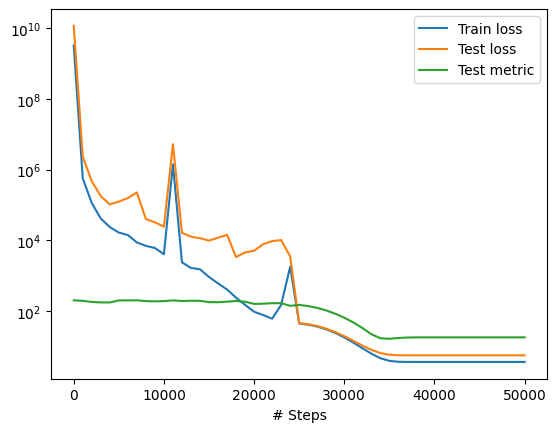

Restoring model from /home/leyang.sun/DeepONet/deeponet/src/model/model.ckpt-40000.ckpt ...

INFO:tensorflow:Restoring parameters from /home/leyang.sun/DeepONet/deeponet/src/model/model.ckpt-40000.ckpt
Test MSE: 5.541163237632219
Test MSE w/o outliers: 3.2360832607109735

Test MAE w/o outliers: 1.3812870587422623

float32 float64
Test smape_loss w/o outliers: 17.857758916017872

Test mape_loss w/o outliers: 18.7187029791665



In [15]:
if __name__ == "__main__":
    main()